In [26]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
data = pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data1 = data.drop('Unnamed: 0',axis=1)
data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
def norm(i):
  x = (i-i.min()/i.max()-i.min())
  return x

In [6]:
data2 = norm(data1)

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
data2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,6.942023,125.626469,33.188352,13.773304
std,4.355510,83.337661,14.474763,9.366385
min,-0.045977,-0.133531,-0.351648,-0.158696
25%,3.229023,63.866469,22.148352,7.616304
50%,6.404023,113.866469,33.648352,12.641304
75%,10.404023,203.866469,45.398352,18.716304
max,16.554023,291.866469,58.648352,38.541304


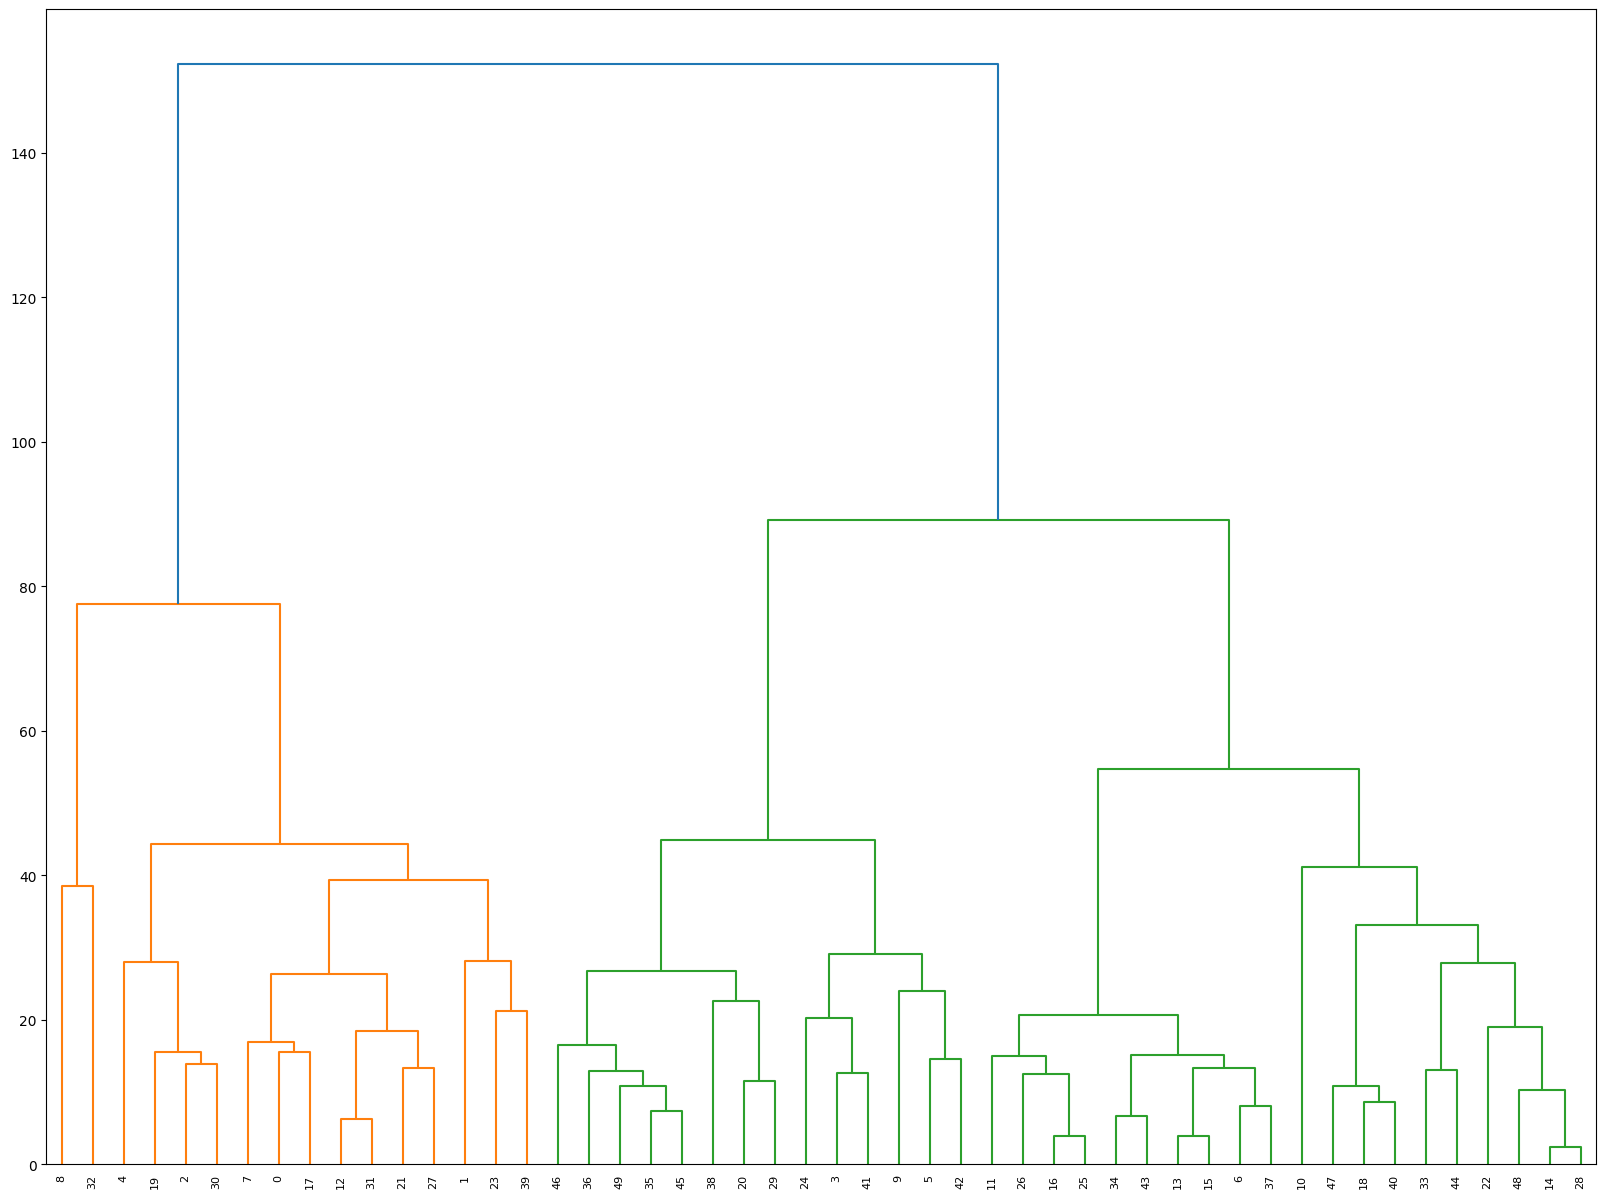

In [9]:
#Ploting a Dendrogram
plt.figure(figsize=(20,15))
dendogram = sch.dendrogram(sch.linkage(data2,method='average'))

#Hierarchical Clustering

In [10]:
data_hc = data

In [11]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')

In [12]:
y_hc = hc.fit_predict(data2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [13]:
y_hc

array([1, 1, 1, 0, 1, 0, 4, 1, 3, 0, 2, 4, 1, 4, 2, 4, 4, 1, 2, 1, 0, 1,
       2, 1, 0, 4, 4, 1, 2, 0, 1, 1, 3, 2, 4, 0, 0, 4, 0, 1, 2, 0, 0, 4,
       2, 0, 0, 2, 2, 0])

In [14]:
data_hc['Clusters'] = y_hc
data_hc.rename(columns={'Unnamed: 0':'Location'},inplace=True)
data_hc.head()

,Location,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [15]:
data_hc['Clusters'].value_counts()

1    14
0    14
4    10
2    10
3     2
Name: Clusters, dtype: int64

In [16]:
data_hc.sort_values('Clusters')
data_hc.iloc[:,[0,-1]]

,Location,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,4
7,Delaware,1
8,Florida,3
9,Georgia,0


#K-Means 

In [17]:
data_km = data

In [18]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data1)
data_sc

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

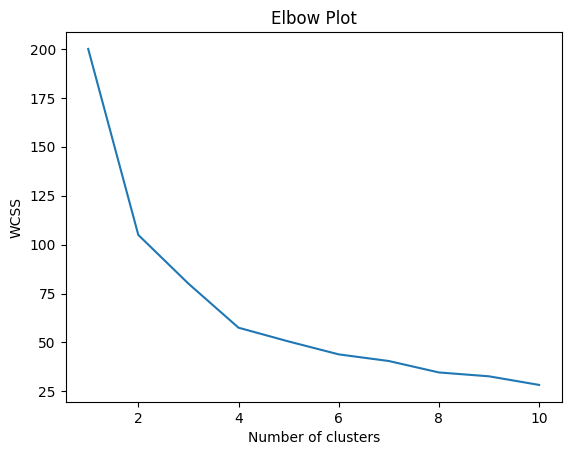

In [19]:
#Calculating correct number of clusters.
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit_transform(data_sc)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Taking 4 as the elbow point, i.e. optimum number of clusters will be 4

In [20]:
cluster_new = KMeans(n_clusters=4,random_state=0)
cluster_new.fit_transform(data_sc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[2.39633991, 1.90362352, 3.1173551 , 0.35537674],
       [3.77264707, 2.31211973, 4.40858258, 2.69258382],
       [2.40333173, 0.85288361, 3.97848805, 2.5750427 ],
       [1.92295548, 2.52161396, 1.98105037, 1.39758379],
       [3.21395573, 1.40080186, 4.90635127, 3.53628207],
       [2.36466123, 1.11723515, 3.84218786, 2.92087532],
       [1.07469177, 3.45128404, 1.78576625, 3.54678125],
       [1.25193111, 2.22511334, 2.4711004 , 2.33837537],
       [3.59759521, 1.45362277, 5.04728308, 2.4447865 ],
       [3.11340299, 2.1285334 , 3.90972318, 1.10245553],
       [1.30502519, 3.22541569, 2.39098772, 3.73297727],
       [1.6500643 , 3.59947299, 0.60989838, 3.12487442],
       [1.92731802, 1.11403932, 3.61100986, 2.2185656 ],
       [0.81696007, 2.46663934, 1.6094773 , 2.35945255],
       [1.92081586, 4.1573849 , 0.55411611, 3.71800448],
       [0.63185068, 2.71983643, 1.35781393, 2.5857275 ],
       [1.84737339, 3.07020305, 1.52826376, 1.98686175],
       [2.7067668 , 1.74165438,

In [21]:
data_km['Clusters'] = cluster_new.labels_
data_km

,Location,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [22]:
data_km1 = data_km.sort_values('Clusters')
data_km1

,Location,Murder,Assault,UrbanPop,Rape,Clusters
49,Wyoming,6.8,161,60,15.6,0
29,New Jersey,7.4,159,89,18.8,0
15,Kansas,6.0,115,66,18.0,0
13,Indiana,7.2,113,65,21.0,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
37,Pennsylvania,6.3,106,72,14.9,0
10,Hawaii,5.3,46,83,20.2,0
6,Connecticut,3.3,110,77,11.1,0


In [23]:
data_km1.iloc[:,[0,-1]]

,Location,Clusters
49,Wyoming,0
29,New Jersey,0
15,Kansas,0
13,Indiana,0
34,Ohio,0
35,Oklahoma,0
36,Oregon,0
37,Pennsylvania,0
10,Hawaii,0
6,Connecticut,0


#DBSCAN

In [24]:
data_db = data

In [28]:
scaler = StandardScaler()
data_db_sc = scaler.fit_transform(data1)

In [48]:
db = DBSCAN(eps=1, min_samples=3)
db.fit_predict(data_db_sc)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

In [54]:
data_db['Clusters'] = db.labels_
data_db

,Location,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [55]:
data_db.iloc[:,[0,-1]]

,Location,Clusters
0,Alabama,0
1,Alaska,-1
2,Arizona,-1
3,Arkansas,-1
4,California,-1
5,Colorado,-1
6,Connecticut,1
7,Delaware,-1
8,Florida,-1
9,Georgia,0
